# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

import random

In [2]:
np.random.seed(29)
random.seed(29)

# Generating our Data

In [3]:
# Taking Number of Instances (N)
N = 200

# Arbitrarily Taken (to ensure they are linearly separable)
mean_1 = np.array([2, 2])
cov_1 = np.array([[1, 0.5], [0.5, 1]])

mean_2 = np.array([-2, -2])
cov_2 = np.array([[1, -0.5], [-0.5, 1]])

X_p = np.random.multivariate_normal(mean_1, cov_1, N // 2)
X_n = np.random.multivariate_normal(mean_2, cov_2, N // 2)

X = np.vstack((X_p, X_n))
X[:5], X[-5:]

(array([[ 2.00853408,  2.71456618],
        [ 1.41158632, -0.73016917],
        [ 1.14374216,  1.61081477],
        [ 0.89499409,  1.77700353],
        [ 1.77318381,  0.82601896]]),
 array([[-2.66401258, -1.68774773],
        [-1.19434396, -1.92022433],
        [-2.59469488, -1.66677014],
        [-2.66928718, -1.63180364],
        [-2.10294927, -2.18556394]]))

In [4]:
# For the labels
y_p = np.ones(shape = (N // 2, 1))
y_n = np.zeros(shape = (N // 2, 1))

y = np.vstack((y_p, y_n))
y[:5], y[-5:]

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

### Visualizing our Data

<Figure size 1000x800 with 0 Axes>

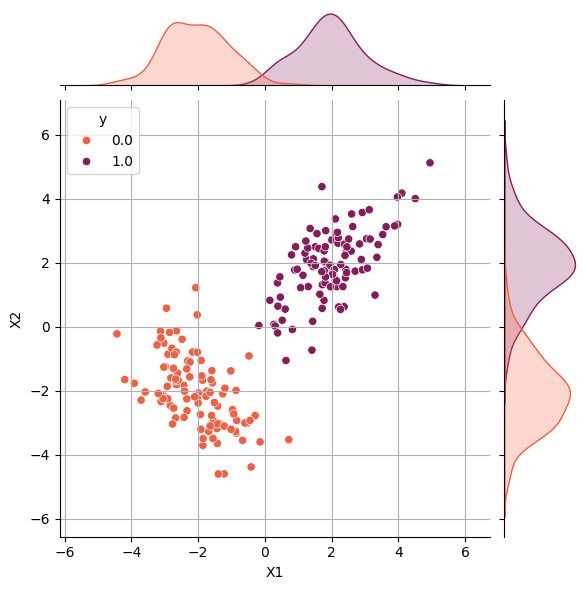

In [5]:
data = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'y': y[:, 0]})

plt.figure(figsize = (10, 8))

sns.jointplot(data = data, x = 'X1', y = 'X2', hue = 'y', palette = 'rocket_r')

plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)

plt.show()

# The Perceptron Learning Algorithm

In [6]:
N , n_features = X.shape

# Initiliazing weights & bias
weights = np.zeros((n_features, 1))
weights

array([[0.],
       [0.]])

In [7]:
# Initiliazing bias
bias = 0
bias

0

In [8]:
i = random.randint(0, N - 1)
x = X[i]
x.reshape(-1, 1)

array([[-2.24002593],
       [-1.09957964]])

In [9]:
epochs = 200

for epoch in tqdm(range(1, epochs + 1)):
    print(f"Epoch: {epoch}")

    i = random.randint(0, N - 1)
    x = X[i]

    if ((y[i] == 1) and (np.dot(x, weights) + bias < 0)):
        weights += x.reshape(-1,1)
        bias += 1
    elif ((y[i] == 0) and (np.dot(x, weights) + bias >= 0)):
        weights -= x.reshape(-1,1)
        bias -= 1


    print(f"Weights: {weights}")
    print(f"Bias: {bias}")
    print("----------------------------")

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch: 1
Weights: [[0.]
 [0.]]
Bias: 0
----------------------------
Epoch: 2
Weights: [[0.]
 [0.]]
Bias: 0
----------------------------
Epoch: 3
Weights: [[2.76271541]
 [3.0375958 ]]
Bias: -1
----------------------------
Epoch: 4
Weights: [[2.76271541]
 [3.0375958 ]]
Bias: -1
----------------------------
Epoch: 5
Weights: [[2.76271541]
 [3.0375958 ]]
Bias: -1
----------------------------
Epoch: 6
Weights: [[2.76271541]
 [3.0375958 ]]
Bias: -1
----------------------------
Epoch: 7
Weights: [[2.76271541]
 [3.0375958 ]]
Bias: -1
----------------------------
Epoch: 8
Weights: [[2.76271541]
 [3.0375958 ]]
Bias: -1
----------------------------
Epoch: 9
Weights: [[2.76271541]
 [3.0375958 ]]
Bias: -1
----------------------------
Epoch: 10
Weights: [[2.76271541]
 [3.0375958 ]]
Bias: -1
----------------------------
Epoch: 11
Weights: [[2.76271541]
 [3.0375958 ]]
Bias: -1
----------------------------
Epoch: 12
Weights: [[2.76271541]
 [3.0375958 ]]
Bias: -1
----------------------------
Epoch: 13
W

### Visualization of Line by Perceptron

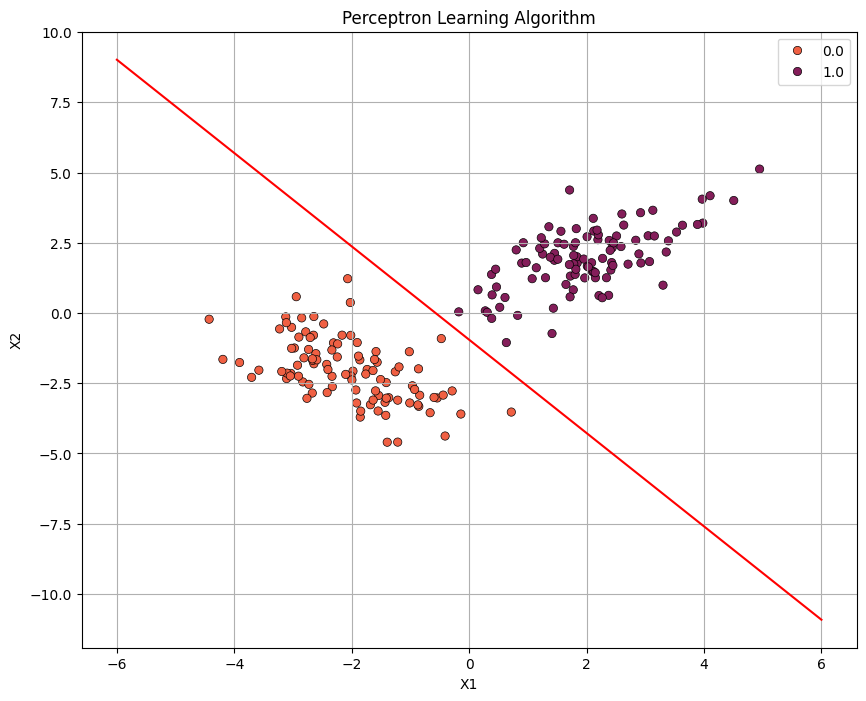

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.ravel(), palette="rocket_r", edgecolor='k')

x_plot = np.linspace(-6, 6, 100)
y_plot = (-bias - weights[0] * x_plot) / weights[1]
plt.plot(x_plot, y_plot, '-r')

plt.title('Perceptron Learning Algorithm')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

### Stopping Criterion

Here we need a stopping criterion besides simple epochs and something similar to early stopping can easily be implemented.

In [11]:
weights = np.zeros((n_features, 1))
bias = 0
weights_list =[]

In [12]:
patience = 20

In [13]:
epochs = 200

for epoch in tqdm(range(1, epochs + 1)):
    print(f"Epoch: {epoch}")

    i = random.randint(0, N - 1)
    x = X[i]
    weights_list.append(weights)

    if ((y[i] == 1) and (np.dot(x, weights) + bias < 0)): # False Negative
        weights += x.reshape(-1,1)
        bias += 1
    elif ((y[i] == 0) and (np.dot(x, weights) + bias >= 0)): # False Positive
        weights -= x.reshape(-1,1)
        bias -= 1

    if epoch >= patience:
        recent_weights = weights_list[-patience:]
        if all((recent_weights[-1] == w).all() for w in recent_weights[:-1]): # Ignoring Bias
            print("\n\nEarly stopping triggered. Weights haven't changed in the last 10 epochs.\n\n")
            break


    print(f"Weights: {weights}")
    print(f"Bias: {bias}")
    print("--------------------------")

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch: 1
Weights: [[0.]
 [0.]]
Bias: 0
--------------------------
Epoch: 2
Weights: [[3.10074399]
 [2.14119841]]
Bias: -1
--------------------------
Epoch: 3
Weights: [[3.10074399]
 [2.14119841]]
Bias: -1
--------------------------
Epoch: 4
Weights: [[3.10074399]
 [2.14119841]]
Bias: -1
--------------------------
Epoch: 5
Weights: [[3.10074399]
 [2.14119841]]
Bias: -1
--------------------------
Epoch: 6
Weights: [[3.10074399]
 [2.14119841]]
Bias: -1
--------------------------
Epoch: 7
Weights: [[3.10074399]
 [2.14119841]]
Bias: -1
--------------------------
Epoch: 8
Weights: [[3.10074399]
 [2.14119841]]
Bias: -1
--------------------------
Epoch: 9
Weights: [[3.10074399]
 [2.14119841]]
Bias: -1
--------------------------
Epoch: 10
Weights: [[3.10074399]
 [2.14119841]]
Bias: -1
--------------------------
Epoch: 11
Weights: [[3.10074399]
 [2.14119841]]
Bias: -1
--------------------------
Epoch: 12
Weights: [[3.10074399]
 [2.14119841]]
Bias: -1
--------------------------
Epoch: 13
Weights:

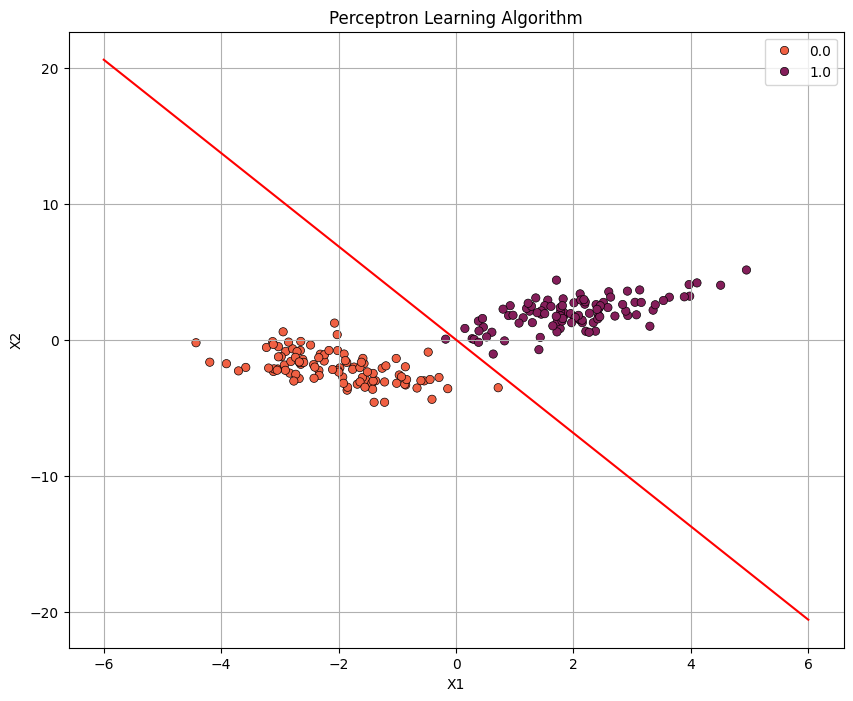

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.ravel(), palette="rocket_r", edgecolor='k')

x_plot = np.linspace(-6, 6, 100)
y_plot = (-bias - weights[0] * x_plot) / weights[1]
plt.plot(x_plot, y_plot, '-r')

plt.title('Perceptron Learning Algorithm')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()